In [29]:
import os
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

In [30]:
# Import model outputs

folder_path = os.path.join('..','models','AlexNet_lr01_epoch1')
output_files = [file_path for file_path in os.listdir(folder_path) if 'outputs' in file_path]

output_files_data = []
for output_file in output_files:
    output_files_data.append(pd.read_csv(os.path.join(folder_path,output_file)))


outputs = pd.concat(output_files_data)

group_by_test_run = outputs.groupby(outputs.index)

pos_mean = group_by_test_run.mean()['pos_probs'].to_numpy()
pos_var = group_by_test_run.var()['pos_probs'].to_numpy()
neg_mean = group_by_test_run.mean()['neg_probs'].to_numpy()
neg_var = group_by_test_run.var()['neg_probs'].to_numpy()

labels = group_by_test_run.mean()['labels']
true_pos_idx = labels == 1
true_neg_idx = labels == 0
        

In [35]:
s=1  # Marker size
alpha = 0.2  # Transparency
fig_size = (7,5)

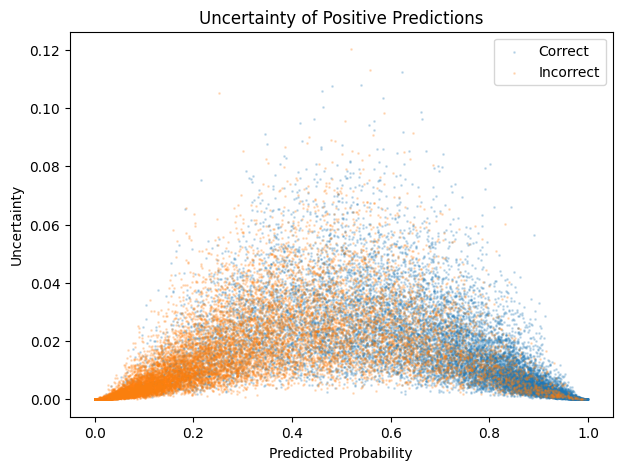

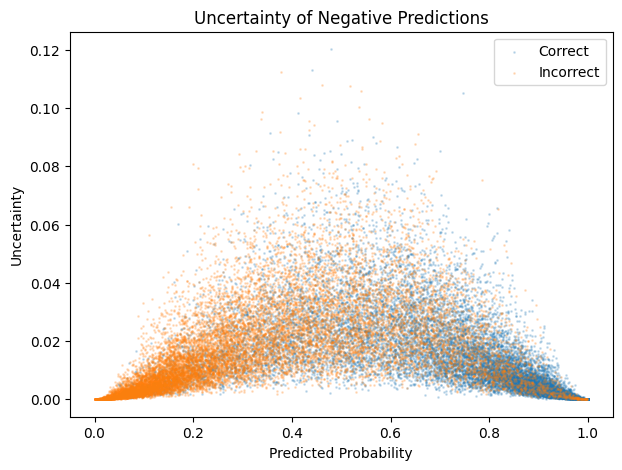

In [36]:
plt.figure(figsize=fig_size)
plt.title('Uncertainty of Positive Predictions')
plt.xlabel('Predicted Probability')
plt.ylabel('Uncertainty')
plt.scatter(pos_mean[true_pos_idx],pos_var[true_pos_idx], s=s, alpha=alpha)
plt.scatter(pos_mean[true_neg_idx],pos_var[true_neg_idx], s=s, alpha=alpha)
plt.legend(['Correct', 'Incorrect'])

plt.figure(figsize=fig_size)
plt.title('Uncertainty of Negative Predictions')
plt.xlabel('Predicted Probability')
plt.ylabel('Uncertainty')
plt.scatter(neg_mean[true_neg_idx],neg_var[true_neg_idx], s=s, alpha=alpha)
plt.scatter(neg_mean[true_pos_idx],neg_var[true_pos_idx], s=s, alpha=alpha)
plt.legend(['Correct', 'Incorrect'])

In [1]:
# plt.figure(figsize=fig_size)
# plt.title('Uncertainty of Positive Predictions')
# plt.xlabel('Accuracy')
# plt.ylabel('Uncertainty')
# plt.scatter(1 - np.abs(pos_mean[true_pos_idx]-labels[true_pos_idx]),pos_var[true_pos_idx], s=s, alpha=alpha)
# plt.scatter(np.abs(pos_mean[true_neg_idx]-labels[true_neg_idx]),pos_var[true_neg_idx], s=s, alpha=alpha)
# plt.legend(['Correct', 'Incorrect'])
# 
# plt.figure(figsize=fig_size)
# plt.title('Uncertainty of Negative Predictions')
# plt.xlabel('Predicted Probability')
# plt.ylabel('Uncertainty')
# plt.scatter(neg_mean[true_neg_idx],neg_var[true_neg_idx], s=s, alpha=alpha)
# plt.scatter(neg_mean[true_pos_idx],neg_var[true_pos_idx], s=s, alpha=alpha)
# plt.legend(['Correct', 'Incorrect'])